# Models Training

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import pylab as pl
from time import process_time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [2]:
def log_reg(param_grid, X_train, y_train, X_test, y_test):
    clf_log_reg = GridSearchCV(LogisticRegression(solver= 'liblinear'), param_grid=param_grid_log_reg, verbose=0, 
                           return_train_score=True, n_jobs=-1, cv=5) 
    clf_log_reg.fit(X_train, y_train)
    cv_results = pd.DataFrame(clf_log_reg.cv_results_)
    scores = clf_log_reg.cv_results_['mean_test_score'].reshape(len(param_grid_log_reg['C']))
    print('Best Params:',clf_log_reg.best_params_, '\n')
    y_pred_log_reg = clf_log_reg.predict(X_test)
    print(classification_report(y_test,y_pred_log_reg))
    return clf_log_reg.best_params_, classification_report(y_test,y_pred_log_reg)

In [3]:
def SVM_rbf_clf(param_grid, X_train, y_train, X_test, y_test):
    clf_svm_rbf = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, verbose=0, 
                               return_train_score=True, cv=5)
    clf_svm_rbf.fit(X_train, y_train)
    cv_results_svm_rbf = pd.DataFrame(clf_svm_rbf.cv_results_)
    scores_svm_rbf = clf_svm_rbf.cv_results_['mean_test_score'].reshape(len(param_grid_svm_rbf['C']),
                                                                        len(param_grid_svm_rbf['gamma'])) 
    heat_map_2d('gamma', 'C', param_grid_svm_rbf, scores_svm_rbf)
    print('Best Params:',clf_svm_rbf.best_params_, '\n')
    y_pred_svm_rbf = clf_svm_rbf.predict(X_test)
    print(classification_report(y_test,y_pred_svm_rbf))
    return clf_svm_rbf.best_params_, classification_report(y_test,y_pred_svm_rbf)

In [4]:
def random_forests_clf(param_grid, X_train, y_train, X_test, y_test):
    clf_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid_rf, verbose=0, 
                          return_train_score=True, n_jobs=-1, cv=5)
    clf_rf.fit(X_train, y_train)
    cv_results_rf = pd.DataFrame(clf_rf.cv_results_)
    scores_rf = clf_rf.cv_results_['mean_test_score'].reshape(len(param_grid_rf['n_estimators']),
                                                              len(param_grid_rf['max_features'])) 
    heat_map_2d('n_estimators', 'max_features', param_grid_rf, scores_rf)
    print('Best Params:', clf_rf.best_params_, '\n')
    y_pred_rf = clf_rf.predict(X_test)
    print(classification_report(y_test,y_pred_rf))
    return clf_rf.best_params_, classification_report(y_test,y_pred_rf)

In [5]:
def mlp_clf(param_grid, X_train, y_train, X_test, y_test):
    clf_mlp = GridSearchCV(MLPClassifier(random_state=42, max_iter=1200), param_grid=param_grid_mlp, verbose=0, 
                       return_train_score=True, n_jobs=-1, cv=5)
    clf_mlp.fit(X_train, y_train)
    cv_results_mlp = pd.DataFrame(clf_mlp.cv_results_)
    scores_mlp = clf_mlp.cv_results_['mean_test_score'].reshape(len(param_grid_mlp['alpha']),
                                                          len(param_grid_mlp['hidden_layer_sizes'])) 
    heat_map_2d('alpha', 'hidden_layer_sizes', param_grid_mlp, scores_mlp)
    print('Best Params:', clf_mlp.best_params_, '\n') 
    y_pred_mlp = clf_mlp.predict(X_test)
    print(classification_report(y_test,y_pred_mlp))
    return clf_mlp.best_params_, classification_report(y_test,y_pred_mlp)

In [6]:
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [7]:
def heat_map_2d(name_param_1, name_param_2, param_grid, scores):
    
    
    plt.figure(figsize=(10, 6))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
               norm=MidpointNormalize(vmin=0.5, midpoint=0.75, vmax=1.0))
    plt.xlabel(name_param_1)
    plt.ylabel(name_param_2)
    plt.colorbar()
    plt.xticks(np.arange(len(param_grid[name_param_1])), param_grid[name_param_1], rotation=45)
    plt.yticks(np.arange(len(param_grid[name_param_2])), param_grid[name_param_2])
    plt.title('Accuracy en validación')
    plt.show()

In [8]:
X_train_low = np.load('./results/X_train_low.npy')
X_test_low = np.load('./results/X_test_low.npy')
y_train_low = np.load('./results/y_train_low.npy')
y_test_low = np.load('./results/y_test_low.npy')

In [9]:
X_train_med = np.load('./results/X_train_med.npy')
X_test_med = np.load('./results/X_test_med.npy')
y_train_med = np.load('./results/y_train_med.npy')
y_test_med = np.load('./results/y_test_med.npy')

In [10]:
X_train_high = np.load('./results/X_train_high.npy')
X_test_high = np.load('./results/X_test_high.npy')
y_train_high = np.load('./results/y_train_high.npy')
y_test_high = np.load('./results/y_test_high.npy')

# Logistic Regression

In [11]:
n = 1

In [12]:
grid_log_reg = [i for i in range(1, 11, 1)]
param_grid_log_reg = {'C': [np.round((0.1*i), decimals =2) for i in grid_log_reg]}
print('Parameters:', param_grid_log_reg)

Parameters: {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}


## low quality

In [13]:
best_params_log_reg_low, report_log_reg_low = log_reg(param_grid_log_reg, X_train_low, y_train_low, 
                                                      X_test_low, y_test_low)

Best Params: {'C': 1.0} 

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       221
           1       0.97      0.80      0.88       112

   micro avg       0.92      0.92      0.92       333
   macro avg       0.94      0.89      0.91       333
weighted avg       0.93      0.92      0.92       333



In [14]:
clf_log_reg_low = LogisticRegression(solver= 'liblinear', C=best_params_log_reg_low['C'])

t_start = process_time()
for i in range(n):
    y_scores_log_reg_low = cross_val_predict(clf_log_reg_low, X_train_low, y_train_low, cv=5, 
                                             method='decision_function', n_jobs=-1)
t_stop = process_time()
t_log_reg_low = (t_stop-t_start)/n

In [15]:
precisions_log_reg_low, recalls_log_reg_low, thresholds_log_reg_low = precision_recall_curve(y_train_low, 
                                                                                             y_scores_log_reg_low)

In [16]:
fpr_log_reg_low, tpr_log_reg_low, thresholds_roc_log_reg_low = roc_curve(y_train_low, y_scores_log_reg_low)

In [17]:
PR_AUC_log_reg_low = metrics.auc(recalls_log_reg_low, precisions_log_reg_low)

# med quality

In [18]:
best_params_log_reg_med, report_log_reg_med = log_reg(param_grid_log_reg, X_train_med, y_train_med, 
                                                      X_test_med, y_test_med)

Best Params: {'C': 1.0} 

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       221
           1       0.96      0.92      0.94       112

   micro avg       0.96      0.96      0.96       333
   macro avg       0.96      0.95      0.96       333
weighted avg       0.96      0.96      0.96       333



In [19]:
clf_log_reg_med = LogisticRegression(solver= 'liblinear', C=best_params_log_reg_med['C'])

t_start = process_time()
for i in range(n):
    y_scores_log_reg_med = cross_val_predict(clf_log_reg_med, X_train_med, y_train_med, cv=5, 
                                         method='decision_function', n_jobs=-1)
t_stop = process_time()
t_log_reg_med = (t_stop-t_start)/n

In [20]:
precisions_log_reg_med, recalls_log_reg_med, thresholds_log_reg_med = precision_recall_curve(y_train_med, 
                                                                                             y_scores_log_reg_med)

In [21]:
fpr_log_reg_med, tpr_log_reg_med, thresholds_roc_log_reg_med = roc_curve(y_train_med, y_scores_log_reg_med)

In [22]:
PR_AUC_log_reg_med = metrics.auc(recalls_log_reg_med, precisions_log_reg_med)

## high quality

In [23]:
best_params_log_reg_high, report_log_reg_high = log_reg(param_grid_log_reg, X_train_high, y_train_high, 
                                                        X_test_high, y_test_high)

Best Params: {'C': 1.0} 

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       221
           1       0.97      0.93      0.95       112

   micro avg       0.97      0.97      0.97       333
   macro avg       0.97      0.96      0.96       333
weighted avg       0.97      0.97      0.97       333



In [ ]:
clf_log_reg_high = LogisticRegression(solver= 'liblinear', C=best_params_log_reg_high['C'])

t_start = process_time()
for i in range(n):
    y_scores_log_reg_high = cross_val_predict(clf_log_reg_high, X_train_high, y_train_med, cv=5, 
                                          method='decision_function', n_jobs=-1)
t_stop = process_time()
t_log_reg_high = (t_stop-t_start)/n

In [ ]:
precisions_log_reg_high, recalls_log_reg_high, thresholds_log_reg_high = precision_recall_curve(y_train_high, 
                                                                         y_scores_log_reg_high)

In [ ]:
fpr_log_reg_high, tpr_log_reg_high, thresholds_roc_log_reg_high = roc_curve(y_train_high, y_scores_log_reg_high)

In [ ]:
PR_AUC_log_reg_high = metrics.auc(recalls_log_reg_high, precisions_log_reg_high)

In [ ]:
roc_auc_log_reg_low = roc_auc_score(y_train_low, y_scores_log_reg_low)
roc_auc_log_reg_med = roc_auc_score(y_train_med, y_scores_log_reg_med)
roc_auc_log_reg_high = roc_auc_score(y_train_high, y_scores_log_reg_high)

# Support Vector Machine - rbf (Kernel Gausiano)

In [ ]:
grid_C = [i for i in range(-5, 7, 1)]
grid_gamma = [i for i in range(0, 11, 1)]
param_grid_svm_rbf = {'C': [2**i for i in grid_C], 
                      'gamma': np.round([0.1*i for i in grid_gamma], decimals=2)}
print('Parameters:', param_grid_svm_rbf)

Parameters: {'C': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64], 'gamma': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}


## low

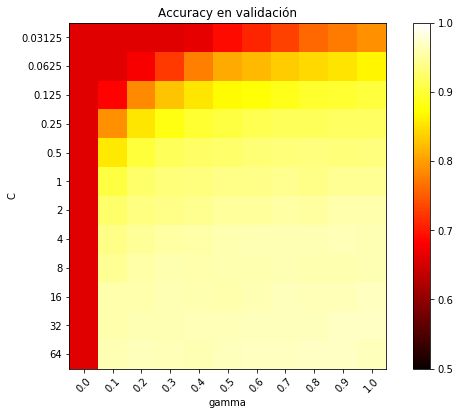

Best Params: {'C': 32, 'gamma': 0.9} 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       221
           1       0.98      0.95      0.96       112

   micro avg       0.98      0.98      0.98       333
   macro avg       0.98      0.97      0.97       333
weighted avg       0.98      0.98      0.98       333



In [ ]:
best_params_SVC_low, report_SVC_low = SVM_rbf_clf(param_grid_svm_rbf, X_train_low, y_train_low, 
                                                  X_test_low, y_test_low)

In [ ]:
clf_SVC_low = SVC(kernel='rbf', C=best_params_SVC_low['C'], gamma=best_params_SVC_low['gamma'])

t_start = process_time()
for i in range(n):
    y_scores_SVC_low = cross_val_predict(clf_SVC_low, X_train_low, y_train_low, cv=5, 
                                         method='decision_function', n_jobs=-1)
t_stop = process_time()
t_SVC_low = (t_stop-t_start)/n

In [ ]:
precisions_SVC_low, recalls_SVC_low, thresholds_SVC_low = precision_recall_curve(y_train_low, 
                                                                                 y_scores_SVC_low)

In [ ]:
fpr_SVC_low, tpr_SVC_low, thresholds_roc_SVC_low = roc_curve(y_train_low, y_scores_SVC_low)

In [ ]:
PR_AUC_SVC_low = metrics.auc(recalls_SVC_low, precisions_SVC_low)

# med

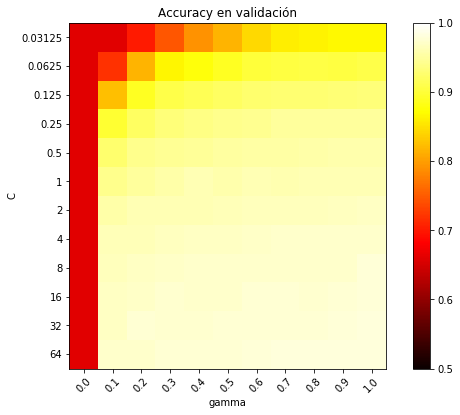

Best Params: {'C': 64, 'gamma': 1.0} 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       221
           1       0.98      0.95      0.96       112

   micro avg       0.98      0.98      0.98       333
   macro avg       0.98      0.97      0.97       333
weighted avg       0.98      0.98      0.98       333



In [ ]:
best_params_SVC_med, report_SVC_med = SVM_rbf_clf(param_grid_svm_rbf, X_train_med, y_train_med, 
                                                  X_test_med, y_test_med)

In [ ]:
clf_SVC_med = SVC(kernel='rbf', C=best_params_SVC_med['C'], gamma=best_params_SVC_med['gamma'])

t_start = process_time()
for i in range(n):
    y_scores_SVC_med = cross_val_predict(clf_SVC_med, X_train_med, y_train_med, cv=5, 
                                     method='decision_function', n_jobs=-1)
t_stop = process_time()
t_SVC_med = (t_stop-t_start)/n

In [ ]:
precisions_SVC_med, recalls_SVC_med, thresholds_SVC_med = precision_recall_curve(y_train_med, 
                                                                                 y_scores_SVC_med)

In [ ]:
fpr_SVC_med, tpr_SVC_med, thresholds_roc_SVC_med = roc_curve(y_train_med, y_scores_SVC_med)

In [ ]:
PR_AUC_SVC_med = metrics.auc(recalls_SVC_med, precisions_SVC_med)

## high

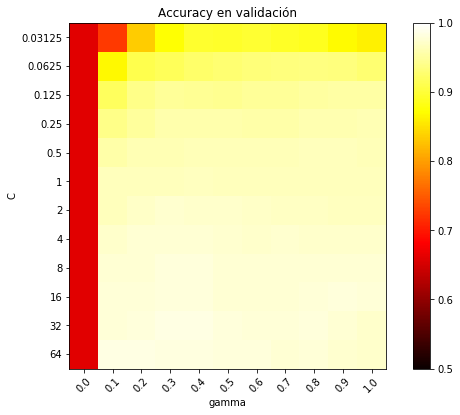

Best Params: {'C': 32, 'gamma': 0.3} 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       221
           1       0.99      0.96      0.97       112

   micro avg       0.98      0.98      0.98       333
   macro avg       0.98      0.98      0.98       333
weighted avg       0.98      0.98      0.98       333



In [ ]:
best_params_SVC_high, report_SVC_high = SVM_rbf_clf(param_grid_svm_rbf, X_train_high, y_train_high, 
                                                    X_test_high, y_test_high)

In [ ]:
clf_SVC_high = SVC(kernel='rbf', C=best_params_SVC_high['C'], gamma=best_params_SVC_high['gamma'])

t_start = process_time()
for i in range(n):
    y_scores_SVC_high = cross_val_predict(clf_SVC_high, X_train_high, y_train_high, cv=5, 
                                         method='decision_function', n_jobs=-1)
t_stop = process_time()
t_SVC_high = (t_stop-t_start)/n

In [ ]:
precisions_SVC_high, recalls_SVC_high, thresholds_SVC_high = precision_recall_curve(y_train_high, 
                                                                                    y_scores_SVC_high)

In [ ]:
fpr_SVC_high, tpr_SVC_high, thresholds_roc_SVC_high = roc_curve(y_train_high, y_scores_SVC_high)

In [ ]:
PR_AUC_SVC_high = metrics.auc(recalls_SVC_high, precisions_SVC_high)

In [ ]:
roc_auc_SVC_low = roc_auc_score(y_train_low, y_scores_SVC_low)
roc_auc_SVC_med = roc_auc_score(y_train_med, y_scores_SVC_med)
roc_auc_SVC_high = roc_auc_score(y_train_high, y_scores_SVC_high)

# Random Forests

In [ ]:
max_features_params_rf = [np.round(10**-1 * i, decimals=2) for i in range(1, 11, 1)]
param_grid_rf = {'n_estimators': [2**i for i in range(2, 12, 1)], 'max_features': max_features_params_rf}
print('Parameters:', param_grid_rf)

Parameters: {'n_estimators': [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048], 'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}


## low

/home/juanfe/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


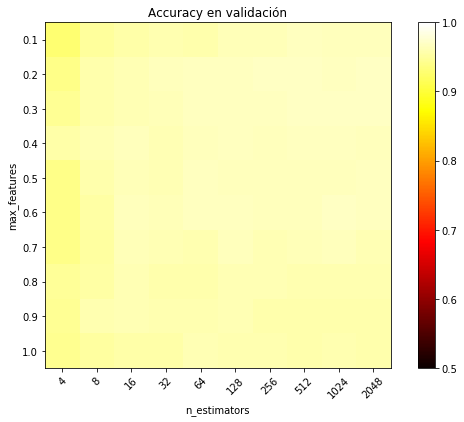

Best Params: {'max_features': 0.2, 'n_estimators': 256} 

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       221
           1       0.99      0.95      0.97       112

   micro avg       0.98      0.98      0.98       333
   macro avg       0.98      0.97      0.98       333
weighted avg       0.98      0.98      0.98       333



In [ ]:
best_params_rf_low, report_rf_low = random_forests_clf(param_grid_rf, X_train_low, y_train_low, 
                                                       X_test_low, y_test_low)

In [ ]:
clf_rf_low = RandomForestClassifier(random_state=42, n_estimators=best_params_rf_low['n_estimators'], 
                                     max_features=best_params_rf_low['max_features'])

t_start = process_time()
for i in range(n):
    y_scores_rf_low = cross_val_predict(clf_rf_low, X_train_low, y_train_low, cv=5, 
                                     method='predict_proba', n_jobs=-1)
t_stop = process_time()
t_rf_low = (t_stop-t_start)/n

In [ ]:
precisions_rf_low, recalls_rf_low, thresholds_rf_low = precision_recall_curve(y_train_low, 
                                                                                 y_scores_rf_low[:,1])

In [ ]:
fpr_rf_low, tpr_rf_low, thresholds_roc_rf_low = roc_curve(y_train_low, y_scores_rf_low[:,1])

In [ ]:
PR_AUC_rf_low = metrics.auc(recalls_rf_low, precisions_rf_low)

## med

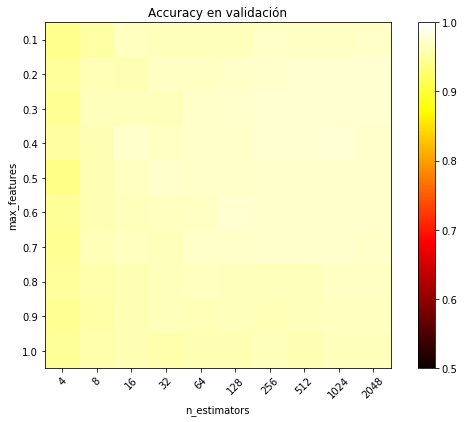

Best Params: {'max_features': 0.4, 'n_estimators': 1024} 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       221
           1       1.00      0.96      0.98       112

   micro avg       0.98      0.98      0.98       333
   macro avg       0.99      0.98      0.98       333
weighted avg       0.99      0.98      0.98       333



In [ ]:
best_params_rf_med, report_rf_med = random_forests_clf(param_grid_rf, X_train_med, y_train_med, 
                                                       X_test_med, y_test_med)

In [ ]:
clf_rf_med = RandomForestClassifier(random_state=42, n_estimators=best_params_rf_med['n_estimators'], 
                                     max_features=best_params_rf_med['max_features'])

t_start = process_time()
for i in range(n):
    y_scores_rf_med = cross_val_predict(clf_rf_med, X_train_med, y_train_med, cv=5, 
                                         method='predict_proba', n_jobs=-1)
t_stop = process_time()
t_rf_med = (t_stop-t_start)/n

In [ ]:
precisions_rf_med, recalls_rf_med, thresholds_rf_med = precision_recall_curve(y_train_med, 
                                                                              y_scores_rf_med[:,1])

In [ ]:
fpr_rf_med, tpr_rf_med, thresholds_roc_rf_med = roc_curve(y_train_med, y_scores_rf_med[:,1])

In [ ]:
PR_AUC_rf_med = metrics.auc(recalls_rf_med, precisions_rf_med)

# high

In [ ]:
best_params_rf_high, report_rf_high = random_forests_clf(param_grid_rf, X_train_high, y_train_high, 
                                                         X_test_high, y_test_high)

In [ ]:
clf_rf_high = RandomForestClassifier(random_state=42, n_estimators=best_params_rf_high['n_estimators'], 
                                     max_features=best_params_rf_high['max_features'])

t_start = process_time()
for i in range(n):
    y_scores_rf_high = cross_val_predict(clf_rf_high, X_train_high, y_train_high, cv=5, 
                                         method='predict_proba', n_jobs=-1)
t_stop = process_time()
t_rf_high = (t_stop-t_start)/n

In [ ]:
precisions_rf_high, recalls_rf_high, thresholds_rf_high = precision_recall_curve(y_train_high, 
                                                                              y_scores_rf_high[:,1])

In [ ]:
fpr_rf_high, tpr_rf_high, thresholds_roc_rf_high = roc_curve(y_train_high, y_scores_rf_high[:,1])

In [ ]:
PR_AUC_rf_high = metrics.auc(recalls_rf_high, precisions_rf_high)

In [ ]:
roc_auc_rf_low = roc_auc_score(y_train_low, y_scores_rf_low[:,1])
roc_auc_rf_med = roc_auc_score(y_train_med, y_scores_rf_med[:,1])
roc_auc_rf_high = roc_auc_score(y_train_high, y_scores_rf_high[:,1])

## Multilayer Perceptron - Red Neuronal

In [ ]:
param_grid_mlp = {'alpha': [np.round(10**-1/4 * i, decimals=2) for i in range(1, 11, 1)], 
                  'hidden_layer_sizes': [2**i for i in range(2, 12, 1)]}
print('Parameters:', param_grid_mlp)

## low

In [ ]:
best_params_mlp_low, report_mlp_low = mlp_clf(param_grid_mlp, X_train_low, y_train_low, X_test_low, y_test_low)

In [ ]:
clf_mlp_low = MLPClassifier(random_state=42, max_iter=1200, alpha=best_params_mlp_low['alpha'], 
                            hidden_layer_sizes=best_params_mlp_low['hidden_layer_sizes'])

t_start = process_time()
for i in range(n):
    y_scores_mlp_low = cross_val_predict(clf_mlp_low, X_train_low, y_train_low, cv=5, 
                                         method='predict_proba', n_jobs=-1)
t_stop = process_time()
t_mlp_low = (t_stop-t_start)/n

In [ ]:
precisions_mlp_low, recalls_mlp_low, thresholds_mlp_low = precision_recall_curve(y_train_low, 
                                                                                 y_scores_mlp_low[:,1])

In [ ]:
fpr_mlp_low, tpr_mlp_low, thresholds_roc_mlp_low = roc_curve(y_train_low, y_scores_mlp_low[:,1])

In [ ]:
PR_AUC_mlp_low = metrics.auc(recalls_mlp_low, precisions_mlp_low)

## med

In [ ]:
best_params_mlp_med, report_mlp_med = mlp_clf(param_grid_mlp, X_train_med, y_train_med, X_test_med, y_test_med)

In [ ]:
clf_mlp_med = MLPClassifier(random_state=42, max_iter=1200, alpha=best_params_mlp_med['alpha'], 
                            hidden_layer_sizes=best_params_mlp_med['hidden_layer_sizes'])

t_start = process_time()
for i in range(n):
    y_scores_mlp_med = cross_val_predict(clf_mlp_med, X_train_med, y_train_med, cv=5, 
                                         method='predict_proba', n_jobs=-1)
t_stop = process_time()
t_mlp_med = (t_stop-t_start)/n

In [ ]:
precisions_mlp_med, recalls_mlp_med, thresholds_mlp_med = precision_recall_curve(y_train_med, 
                                                                                 y_scores_mlp_med[:,1])

In [ ]:
fpr_mlp_med, tpr_mlp_med, thresholds_roc_mlp_med = roc_curve(y_train_med, y_scores_mlp_med[:,1])

In [ ]:
PR_AUC_mlp_med = metrics.auc(recalls_mlp_med, precisions_mlp_med)

## high

In [ ]:
best_params_mlp_high, report_mlp_high = mlp_clf(param_grid_mlp, X_train_high, y_train_high, 
                                                X_test_high, y_test_high)

In [ ]:
clf_mlp_high = MLPClassifier(random_state=42, max_iter=1200, alpha=best_params_mlp_high['alpha'], 
                             hidden_layer_sizes=best_params_mlp_high['hidden_layer_sizes'])

t_start = process_time()
for i in range(n):
    y_scores_mlp_high = cross_val_predict(clf_mlp_high, X_train_high, y_train_high, cv=5, 
                                          method='predict_proba', n_jobs=-1)
t_stop = process_time()
t_mlp_high = (t_stop-t_start)/n

In [ ]:
precisions_mlp_high, recalls_mlp_high, thresholds_mlp_high = precision_recall_curve(y_train_high, 
                                                                                    y_scores_mlp_high[:,1])

In [ ]:
fpr_mlp_high, tpr_mlp_high, thresholds_roc_mlp_high = roc_curve(y_train_high, y_scores_mlp_high[:,1])

In [ ]:
PR_AUC_mlp_high = metrics.auc(recalls_mlp_high, precisions_mlp_high)

In [ ]:
roc_auc_mlp_low = roc_auc_score(y_train_low, y_scores_mlp_low[:,1])
roc_auc_mlp_med = roc_auc_score(y_train_med, y_scores_mlp_med[:,1])
roc_auc_mlp_high = roc_auc_score(y_train_high, y_scores_mlp_high[:,1])

# Save Data

In [ ]:
index_df = ['Best_Params', 'Report', 'Precisions', 'Recalls', 'Thresholds', 'False_Positives_Rate',
            'True_Positive_Rate', 'Thresholds_ROC', 'ROC_AUC', 'Processing_Time', 'PR_AUC']

In [ ]:
df_low = pd.DataFrame(index=index_df)

df_low['LOG_REG'] = [best_params_log_reg_low, report_log_reg_low, 
                     precisions_log_reg_low[:-1].tolist(), recalls_log_reg_low[:-1].tolist(), thresholds_log_reg_low.tolist(),
                     fpr_log_reg_low.tolist(), tpr_log_reg_low.tolist(), thresholds_roc_log_reg_low.tolist(),
                     roc_auc_log_reg_low, t_log_reg_low, PR_AUC_log_reg_low]

df_low['SVC'] = [best_params_SVC_low, report_SVC_low,
                 precisions_SVC_low[:-1].tolist(), recalls_SVC_low.tolist()[:-1], thresholds_SVC_low.tolist(),
                 fpr_SVC_low.tolist(), tpr_SVC_low.tolist(), thresholds_roc_SVC_low.tolist(),
                 roc_auc_SVC_low, t_SVC_low, PR_AUC_SVC_low]

df_low['RF'] = [best_params_rf_low, report_rf_low,
                precisions_rf_low[:-1].tolist(), recalls_rf_low.tolist()[:-1], thresholds_rf_low.tolist(),
                fpr_rf_low.tolist(), tpr_rf_low.tolist(), thresholds_roc_rf_low.tolist(),
                roc_auc_rf_low, t_rf_low, PR_AUC_rf_low]

df_low['MLP'] = [best_params_mlp_low, report_mlp_low,
                 precisions_mlp_low[:-1].tolist(), recalls_mlp_low[:-1].tolist(), thresholds_mlp_low.tolist(),
                 fpr_mlp_low.tolist(), tpr_mlp_low.tolist(), thresholds_roc_mlp_low.tolist(),
                 roc_auc_mlp_low, t_mlp_low, PR_AUC_mlp_low]

In [ ]:
df_med = pd.DataFrame(index=index_df)

df_med['LOG_REG'] = [best_params_log_reg_med, report_log_reg_med, 
                     precisions_log_reg_med[:-1].tolist(), recalls_log_reg_med[:-1].tolist(), thresholds_log_reg_med.tolist(),
                     fpr_log_reg_med.tolist(), tpr_log_reg_med.tolist(), thresholds_roc_log_reg_med.tolist(),
                     roc_auc_log_reg_med, t_log_reg_med, PR_AUC_log_reg_med]

df_med['SVC'] = [best_params_SVC_med, report_SVC_med,
                 precisions_SVC_med[:-1].tolist(), recalls_SVC_med[:-1].tolist(), thresholds_SVC_med.tolist(),
                 fpr_SVC_med.tolist(), tpr_SVC_med.tolist(), thresholds_roc_SVC_med.tolist(),
                 roc_auc_SVC_med, t_SVC_med, PR_AUC_SVC_med]

df_med['RF'] = [best_params_rf_med, report_rf_med,
                precisions_rf_med.tolist()[:-1], recalls_rf_med[:-1].tolist(), thresholds_rf_med.tolist(), 
                fpr_rf_med.tolist(), tpr_rf_med.tolist(), thresholds_roc_rf_med.tolist(),
                roc_auc_rf_med, t_rf_med, PR_AUC_rf_med]

df_med['MLP'] = [best_params_mlp_med, report_mlp_med,
                 precisions_mlp_med[:-1].tolist(), recalls_mlp_med[:-1].tolist(), thresholds_mlp_med.tolist(), 
                 fpr_mlp_med.tolist(), tpr_mlp_med.tolist(), thresholds_roc_mlp_med.tolist(),
                 roc_auc_mlp_med, t_mlp_med, PR_AUC_mlp_med]

In [ ]:
df_high = pd.DataFrame(index=index_df)

df_high['LOG_REG'] = [best_params_log_reg_high, report_log_reg_high, 
                      precisions_log_reg_high[:-1].tolist(), recalls_log_reg_high[:-1].tolist(), thresholds_log_reg_high.tolist(),
                      fpr_log_reg_high.tolist(), tpr_log_reg_high.tolist(), thresholds_roc_log_reg_high.tolist(),
                      roc_auc_log_reg_high, t_log_reg_high, PR_AUC_log_reg_high]

df_high['SVC'] = [best_params_SVC_high, report_SVC_high,
                  precisions_SVC_high[:-1].tolist(), recalls_SVC_high[:-1].tolist(), thresholds_SVC_high.tolist(),
                  fpr_SVC_high.tolist(), tpr_SVC_high.tolist(), thresholds_roc_SVC_high.tolist(),
                  roc_auc_SVC_high, t_SVC_high, PR_AUC_SVC_high]

df_high['RF'] = [best_params_rf_high, report_rf_high,
                 precisions_rf_high[:-1].tolist(), recalls_rf_high[:-1].tolist(), thresholds_rf_high.tolist(),
                 fpr_rf_high.tolist(), tpr_rf_high.tolist(), thresholds_roc_rf_high.tolist(),
                 roc_auc_rf_high, t_rf_high, PR_AUC_rf_high]

df_high['MLP'] = [best_params_mlp_high, report_mlp_high,
                  precisions_mlp_high[:-1].tolist(), recalls_mlp_high[:-1].tolist(), thresholds_mlp_high.tolist(),
                  fpr_mlp_high.tolist(), tpr_mlp_high.tolist(), thresholds_roc_mlp_high.tolist(),
                  roc_auc_mlp_high, t_mlp_high, PR_AUC_mlp_high]

In [ ]:
df_low.to_csv(path_low, index=True)
df_med.to_csv(path_med, index=True)
df_high.to_csv(path_high, index=True)
df_med